# Lung Cancer detection with LIDC-IDRI dataset

Link to the video of the project:
https://youtu.be/n3XgTroqy_Y?si=jvUwhaXTaFZREdh3

#### Libraries used:

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import  DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

import time
import json

import utils

TARGET = "malignancy"

## Context

In the initial execution, the commented portion of the code should be uncommented. However, this notebook was commented out because the resulting CSV file is already available. 

The get_features function extracts radiomic features from annotated lung nodules in CT scans. It groups annotations, creates a consensus mask for each nodule, and utilizes a feature extractor to calculate image and nodule attributes. The results are compiled into a DataFrame, organized by patient and nodule.

In [2]:
# features_df = utils.get_features()
# features_df.to_csv('radiomic_features.csv')

### Just remembering

As previously mentioned, with the dataset already available, we load it here for further utilization in other sections of the code. The radiomic_features.csv file houses the extracted radiomic features organized in a DataFrame, facilitating seamless access and manipulation of the data throughout the analysis process.

In [3]:
features_df = pd.read_csv('data/radiomic_features.csv')
features_df

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,...,Patient_ID,Nodule_ID,subtlety,internalStructure,sphericity,margin,lobulation,spiculation,texture,malignancy
0,v3.0.1,1.23.5,2.3.0-g277b7,1.4.1,3.11.5,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},966db6c8d814983bbfe7125907b2ae5008c7994e,3D,"(1.0, 1.0, 1.0)",...,LIDC-IDRI-0078,Nodule_1,4,1,4,4,2,2,5,3.75
1,v3.0.1,1.23.5,2.3.0-g277b7,1.4.1,3.11.5,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},d750f93365c734f6f1972e806b046bb1a203f47f,3D,"(1.0, 1.0, 1.0)",...,LIDC-IDRI-0078,Nodule_2,5,1,4,2,4,1,5,3.75
2,v3.0.1,1.23.5,2.3.0-g277b7,1.4.1,3.11.5,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},58d9ee5073ad7215556c1e295a67e9204a623b2d,3D,"(1.0, 1.0, 1.0)",...,LIDC-IDRI-0078,Nodule_3,4,1,5,5,1,1,5,1.00
3,v3.0.1,1.23.5,2.3.0-g277b7,1.4.1,3.11.5,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},312913e3e22bc6f2e6cffc8abd1120da5fa413fd,3D,"(1.0, 1.0, 1.0)",...,LIDC-IDRI-0078,Nodule_4,5,1,4,2,4,3,5,4.25
4,v3.0.1,1.23.5,2.3.0-g277b7,1.4.1,3.11.5,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},08706c40effcb9f7489dc9ce0139a265b8dc6048,3D,"(1.0, 1.0, 1.0)",...,LIDC-IDRI-0069,Nodule_5,3,1,5,5,5,5,5,3.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646,v3.0.1,1.23.5,2.3.0-g277b7,1.4.1,3.11.5,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},db18dcbfdf1ebd1c1390db9dd1fbfd85cce4724b,3D,"(1.0, 1.0, 1.0)",...,LIDC-IDRI-0639,Nodule_2647,4,1,4,4,2,2,5,4.00
2647,v3.0.1,1.23.5,2.3.0-g277b7,1.4.1,3.11.5,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},fe63df501e056c7f875ab771151194481c70a0b1,3D,"(1.0, 1.0, 1.0)",...,LIDC-IDRI-0639,Nodule_2648,1,1,4,1,1,1,1,3.50
2648,v3.0.1,1.23.5,2.3.0-g277b7,1.4.1,3.11.5,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},e25d0da08cbc45ea3587c9426cc102940176a4de,3D,"(1.0, 1.0, 1.0)",...,LIDC-IDRI-0638,Nodule_2649,2,1,4,3,1,1,5,3.50
2649,v3.0.1,1.23.5,2.3.0-g277b7,1.4.1,3.11.5,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},5888efc13966913742433819826d00f4d79f0c24,3D,"(1.0, 1.0, 1.0)",...,LIDC-IDRI-0638,Nodule_2650,5,1,4,5,1,1,5,2.00


### Pre-processing

The pre_processing function is designed to meticulously clean and prepare the dataset for analysis. 
* Data Cleaning: Removes columns with a single unique value.
* Data Selection: Selects only numerical columns (integer and floating point).
* Function Output: Returns a cleaned DataFrame with relevant numerical features.


In [4]:
pre_processed_df = utils.pre_processing(features_df)
pre_processed_df

,diagnostics_Image-original_Mean,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,...,original_glszm_ZonePercentage,original_glszm_ZoneVariance,subtlety,internalStructure,sphericity,margin,lobulation,spiculation,texture,malignancy
0,0.051024,1903,1,0.848594,0.219031,5.542891,25.306411,24.020824,39.051248,26.000000,...,0.000525,0.000000e+00,4,1,4,4,2,2,5,3.75
1,0.054136,1741,1,0.845360,0.215045,5.209030,24.222923,30.016662,31.064449,23.021729,...,0.000574,0.000000e+00,5,1,4,2,4,1,5,3.75
2,0.007535,34,1,0.879310,0.289526,1.632763,5.639429,6.000000,6.324555,5.099020,...,0.029412,0.000000e+00,4,1,5,5,1,1,5,1.00
3,0.063299,3646,3,0.956858,0.216692,6.435946,29.700850,37.054015,43.566042,35.227830,...,0.000823,2.949211e+06,5,1,4,2,4,3,5,4.25
4,0.014866,521,1,0.779886,0.595806,7.374952,12.378110,15.524175,14.142136,12.041595,...,0.001919,0.000000e+00,3,1,5,5,5,5,5,3.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646,0.010188,325,1,0.793847,0.375133,4.534490,12.087678,12.806248,11.401754,13.928388,...,0.003077,0.000000e+00,4,1,4,4,2,2,5,4.00
2647,0.019069,623,1,0.754255,0.687954,8.589183,12.485120,14.422205,14.317821,12.649111,...,0.001605,0.000000e+00,1,1,4,1,1,1,1,3.50
2648,0.020854,189,1,0.564212,0.185778,2.586515,13.922612,11.045361,14.866069,12.165525,...,0.005291,0.000000e+00,2,1,4,3,1,1,5,3.50
2649,0.007404,77,1,0.453474,0.247844,2.471175,9.970706,7.280110,7.211103,7.615773,...,0.012987,0.000000e+00,5,1,4,5,1,1,5,2.00


### Normalization

The normalize_dataframe function prepares data for modeling by normalizing features and adjusting the target variable. It separates the target column, applies MinMaxScaler to scale features between 0 and 1, rounds and converts target values to integers, filters cases with a malignancy score of 3, and binarizes the target (scores above 3 as 1, scores below 3 as 0). This returns a normalized DataFrame suitable for classification models.

In [5]:
normalized_df = utils.normalize_dataframe(pre_processed_df, TARGET)
normalized_df

,diagnostics_Image-original_Mean,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,...,original_glszm_ZonePercentage,original_glszm_ZoneVariance,subtlety,internalStructure,sphericity,margin,lobulation,spiculation,texture,malignancy
0,0.398388,0.041876,0.000,0.800345,0.240954,0.156384,0.363943,0.359994,0.519872,0.293561,...,0.002402,0.000000,0.75,0.0,0.75,0.75,0.25,0.25,1.0,1
1,0.423089,0.038302,0.000,0.795950,0.236569,0.146965,0.346630,0.462676,0.404700,0.256770,...,0.002647,0.000000,1.00,0.0,0.75,0.25,0.75,0.00,1.0,1
2,0.053140,0.000640,0.000,0.842097,0.318505,0.046066,0.049688,0.051377,0.047941,0.035367,...,0.146866,0.000000,0.75,0.0,1.00,1.00,0.00,0.00,1.0,0
3,0.495832,0.080333,0.125,0.947505,0.238381,0.181580,0.434161,0.583195,0.584977,0.407555,...,0.003889,0.026006,1.00,0.0,0.75,0.25,0.75,0.50,1.0,1
5,0.048397,0.000221,0.000,0.707831,0.000000,0.000000,0.039630,0.017126,0.034395,0.034143,...,0.333183,0.000000,0.25,0.0,0.75,0.75,1.00,1.00,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646,0.074199,0.007060,0.000,0.725930,0.412680,0.127934,0.152723,0.167938,0.121156,0.144438,...,0.015162,0.000000,0.75,0.0,0.75,0.75,0.25,0.25,1.0,1
2647,0.144706,0.013635,0.000,0.672113,0.756811,0.242330,0.159074,0.195612,0.163207,0.128635,...,0.007802,0.000000,0.00,0.0,0.75,0.00,0.00,0.00,0.0,1
2648,0.158873,0.004060,0.000,0.413795,0.204373,0.072975,0.182043,0.137781,0.171113,0.122661,...,0.026235,0.000000,0.25,0.0,0.75,0.50,0.00,0.00,1.0,1
2649,0.052095,0.001589,0.000,0.263273,0.272650,0.069720,0.118897,0.073299,0.060726,0.066457,...,0.064724,0.000000,1.00,0.0,0.75,1.00,0.00,0.00,1.0,0


### Readability Improveness  

The `rename_columns` function in Pandas simplifies column names in a DataFrame by retaining only the final segment following the delimiter “_”. This enhancement enhances readability, particularly for lengthy or intricate original names. The function establishes a correspondence between the old and new names and subsequently renames the columns. Consequently, the resulting DataFrame possesses more succinct names, facilitating easier management and analysis in subsequent steps.

In [6]:
df = utils.rename_columns(normalized_df)
df

,Mean,VoxelNum,VolumeNum,Elongation,Flatness,LeastAxisLength,MajorAxisLength,Maximum2DDiameterColumn,Maximum2DDiameterRow,Maximum2DDiameterSlice,...,ZonePercentage,ZoneVariance,subtlety,internalStructure,sphericity,margin,lobulation,spiculation,texture,malignancy
0,0.398388,0.041876,0.000,0.800345,0.240954,0.156384,0.363943,0.359994,0.519872,0.293561,...,0.002402,0.000000,0.75,0.0,0.75,0.75,0.25,0.25,1.0,1
1,0.423089,0.038302,0.000,0.795950,0.236569,0.146965,0.346630,0.462676,0.404700,0.256770,...,0.002647,0.000000,1.00,0.0,0.75,0.25,0.75,0.00,1.0,1
2,0.053140,0.000640,0.000,0.842097,0.318505,0.046066,0.049688,0.051377,0.047941,0.035367,...,0.146866,0.000000,0.75,0.0,1.00,1.00,0.00,0.00,1.0,0
3,0.495832,0.080333,0.125,0.947505,0.238381,0.181580,0.434161,0.583195,0.584977,0.407555,...,0.003889,0.026006,1.00,0.0,0.75,0.25,0.75,0.50,1.0,1
5,0.048397,0.000221,0.000,0.707831,0.000000,0.000000,0.039630,0.017126,0.034395,0.034143,...,0.333183,0.000000,0.25,0.0,0.75,0.75,1.00,1.00,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646,0.074199,0.007060,0.000,0.725930,0.412680,0.127934,0.152723,0.167938,0.121156,0.144438,...,0.015162,0.000000,0.75,0.0,0.75,0.75,0.25,0.25,1.0,1
2647,0.144706,0.013635,0.000,0.672113,0.756811,0.242330,0.159074,0.195612,0.163207,0.128635,...,0.007802,0.000000,0.00,0.0,0.75,0.00,0.00,0.00,0.0,1
2648,0.158873,0.004060,0.000,0.413795,0.204373,0.072975,0.182043,0.137781,0.171113,0.122661,...,0.026235,0.000000,0.25,0.0,0.75,0.50,0.00,0.00,1.0,1
2649,0.052095,0.001589,0.000,0.263273,0.272650,0.069720,0.118897,0.073299,0.060726,0.066457,...,0.064724,0.000000,1.00,0.0,0.75,1.00,0.00,0.00,1.0,0


In [7]:
df["malignancy"].value_counts()

malignancy
0    1123
1     502
Name: count, dtype: int64

### Prepare for Testing

The prepare_data function prepares the dataset for training and testing. It separates the features (X) from the target (y), splits the data into training and test sets (with a default test size of 20%), and applies SMOTE to the training data to balance the number of examples in each class and reduce biased results. It returns the resampled training data and the original test set.

In [ ]:
X_train, X_test, y_train, y_test = utils.prepare_data(df, TARGET, test_size=0.2)

### Models Configuration

This cell defines the configuration for multiple machine learning models, each represented by a dictionary entry (e.g., 'randomForest', 'gradientBoosting').

In [9]:
models = {
    'randomForest': {
        'model': RandomForestClassifier,
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False]
        }
    },
    'gradientBoosting': {
        'model': GradientBoostingClassifier,
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1, 0.05],
            'max_depth': [3, 4, 5],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'supportVectorClassifier': {
        'model': SVC,
        'params': {
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto']
        }
    },
    'kNeighbors': {
        'model': KNeighborsClassifier,
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan', 'minkowski']

        }
    },
    'decisionTree': {
        'model': DecisionTreeClassifier,
        'params': {
            'criterion': ['gini', 'entropy'],
            'splitter': ['best', 'random'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    }
}

### Model Hyperparameter Tuning
This function performs hyperparameter tuning for all models using GridSearchCV to optimize their performance on the training set.

In [10]:

def tuning(models, X_train, y_train, X_test, y_test):
    logs = [] 
    models_with_best_params = {} 

    for model_name, mp in models.items():
        start_time = time.time()

        try:
            # Uses GridSearchCV to determine the best parameters
            clf = GridSearchCV(mp['model'](), mp['params'], cv=5, n_jobs=-1, scoring='accuracy')
            clf.fit(X_train, y_train)

            # Saves the best parameters for each model
            models_with_best_params[model_name] = {
                'model': mp['model'].__name__,  # Saves the name of the class of the model
                'params': clf.best_params_  
            }

            # Adds info to the logs
            logs.append(f"Melhores parâmetros para {model_name}: {clf.best_params_}\n")
            logs.append(f"Melhor score para {model_name}: {clf.best_score_}\n")

            # Evaluates the model in the test data
            grid_predictions = clf.predict(X_test)

            logs.append(f"Relatório de classificação para {model_name}:\n{classification_report(y_test, grid_predictions)}\n")

            accuracy = accuracy_score(y_test, grid_predictions)
            precision = precision_score(y_test, grid_predictions, average='weighted')
            recall = recall_score(y_test, grid_predictions, average='weighted')

            logs.append(f"{model_name} - Acurácia: {accuracy}\n")
            logs.append(f"{model_name} - Precisão: {precision}\n")
            logs.append(f"{model_name} - Recall: {recall}\n")

            elapsed_time = time.time() - start_time
            logs.append(f"Tempo total para {model_name}: {elapsed_time:.2f} segundos\n")

        except Exception as e:
            logs.append(f"Ocorreu um erro durante o processamento do modelo {model_name}: {e}\n")
            
    # Saves the logs and parameters to a .txt
    with open('tuning.txt', 'w') as f:
        f.writelines(logs)
    with open('hyperparams.json', 'w') as f:
        json.dump(models_with_best_params, f, indent=4)

    return models_with_best_params  # Returns a dictionary with the best parameters

The function call is commented out because it saves the values to a JSON file after execution. This allows us to avoid rerunning the function, since the process is very time-consuming.

In [11]:
#models_with_best_params = tuning(models, X_train, y_train, X_test, y_test)

load_models and train_model are two auxiliary functions to facilitate graphic plotting.

train_models utilizes only the best hyperparameters determined by the hyperparameter tuning.

## Model Accuracy Evaluation
Here, each model is evaluated for accuracy on the test set, the confusion matrix of each individual model is presented and results of all the models are presented in a bar plot for easy comparison.

In [12]:
file_path = 'hyperparams.json'
models = utils.load_models(file_path) 

<Figure size 640x480 with 0 Axes>

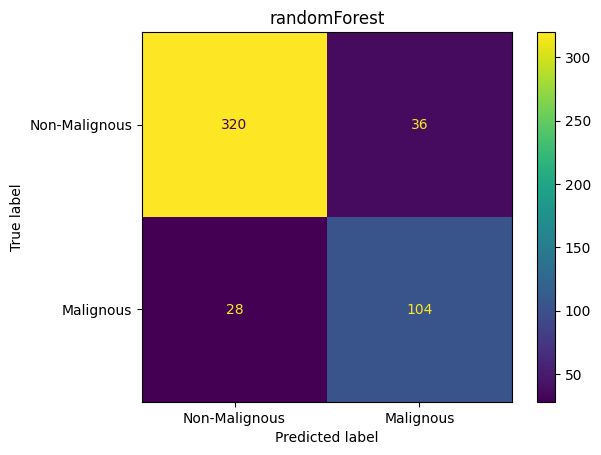

<Figure size 640x480 with 0 Axes>

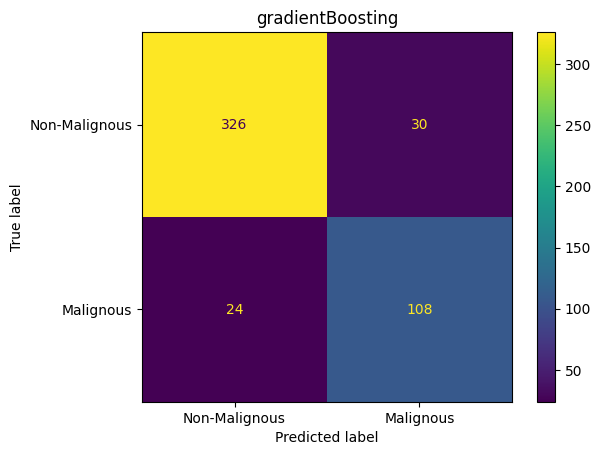

<Figure size 640x480 with 0 Axes>

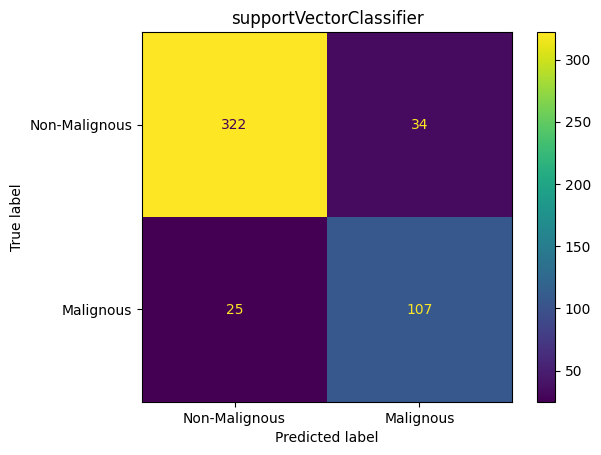

<Figure size 640x480 with 0 Axes>

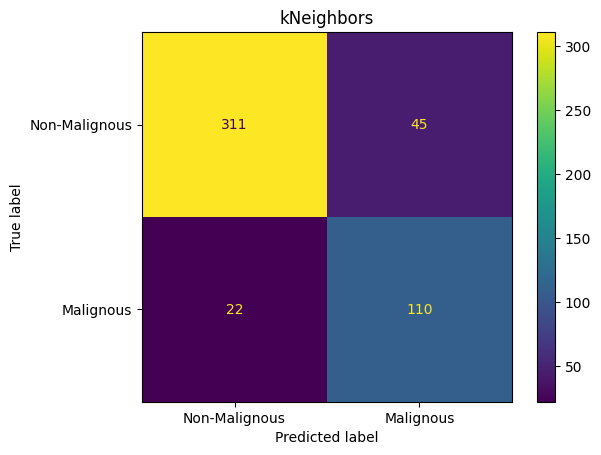

<Figure size 640x480 with 0 Axes>

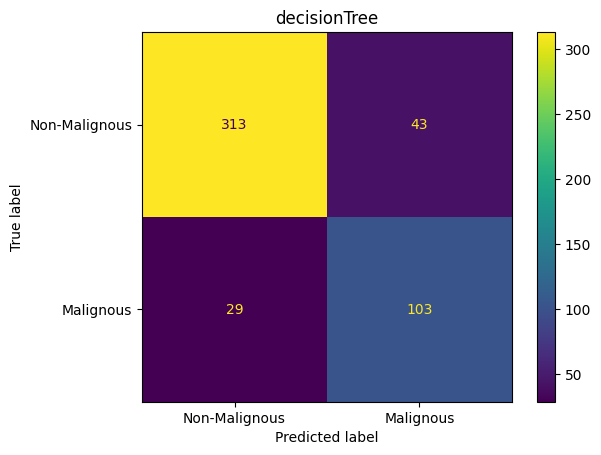

In [13]:
accuracies = utils.evaluate_models(models, X_train, y_train, X_test, y_test)

/Users/gabrielasimon/Desktop/lab-iacd/LabIACD/utils.py:170: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{int(y)}%' for y in plt.gca().get_yticks()])


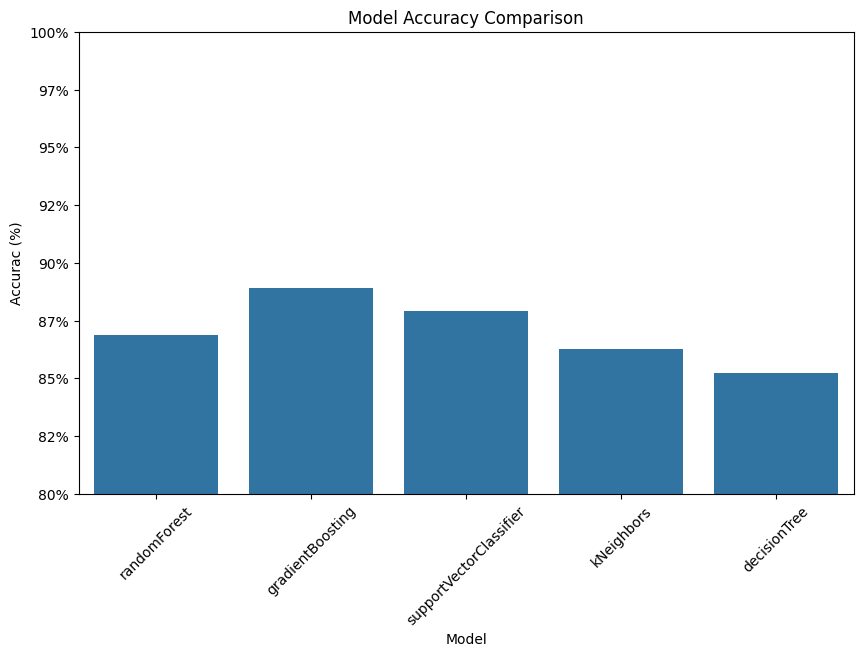

In [14]:
utils.plot_accuracy_comparison(accuracies)  

## Conclusions


The application of machine learning models allowed for an effective differentiation between malignant and non-malignant nodules, achieving a satisfactory level of accuracy.

During the process of evaluating the models, we noticed that including all the features initially extracted did not result in the best performance. Many of the variables had little to no relation to nodule malignancy, while others were highly correlated with each other, which added redundancy and increased the complexity of the model without bringing significant gains in accuracy. By selecting features, it was possible to obtain more accurate results.

Overall, we are pleased with the results obtained. Given the dataset's size and complexity, we consider our feature extraction, model training and hyperparameter tuning to have been effective.